# Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar DF

In [35]:
crimes = pd.read_csv('src/crimes.csv')

# Consigna 1

In [36]:
crimes["TIME OCC STR"] = crimes["TIME OCC"].astype(str).str.zfill(4)
crimes["HOUR OCC"] = crimes["TIME OCC STR"].str.slice(0, 2).astype(int)

In [37]:
crime_frequency = crimes["HOUR OCC"].value_counts().sort_index().reset_index()
crime_frequency.columns = ["HOUR OCC", "Frequency"]

In [38]:
peak_crime_hour = crime_frequency.loc[crime_frequency["Frequency"].idxmax(), "HOUR OCC"]
crime_frequency["Peak"] = crime_frequency["HOUR OCC"] == peak_crime_hour

##  Grafico

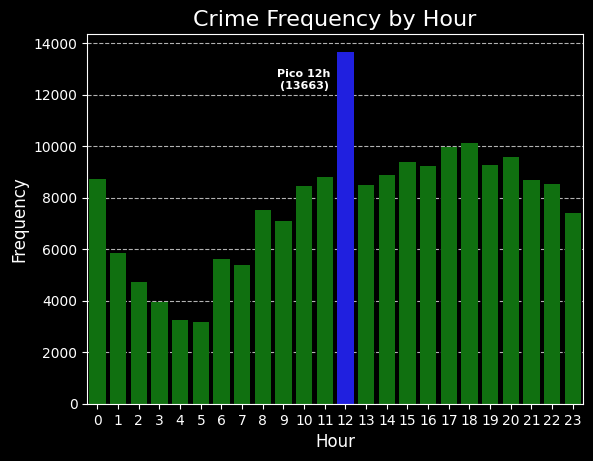

In [39]:
plt.style.use("dark_background")
ax = sns.barplot(
    data=crime_frequency,
    x="HOUR OCC",
    y="Frequency",
    hue="Peak",
    palette={True: "blue", False: "green"},
    dodge=False,
    legend=False,
)

plt.title("Crime Frequency by Hour", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.xticks(range(0, 24))
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

max_count = crime_frequency["Frequency"].max()
plt.text(
    peak_crime_hour - 2,
    max_count - 1500,
    f"Pico {peak_crime_hour}h\n({max_count})",
    ha="center",
    va="bottom",
    fontsize=8,
    color="white",
    weight="bold",
)
plt.savefig("src/crime_frequency_by_hour.svg", dpi=300)

plt.show()

# Consigna 2

In [40]:
# night_hours = [22,23,0,1,2,3]
# crime_night = crimes[crimes['HOUR OCC'].isin(night_hours)]
# counter_area = crime_night['AREA NAME'].value_counts().reset_index()
# counter_area.columns = ['AREA NAME', 'Count']
# peak_night_crime_location = f'El area con mayor delitos nocturnos es {counter_area.iloc[0,0]} con {counter_area.iloc[0,1]} delitos'

# print(peak_night_crime_location)



crime_night = crimes[(crimes['HOUR OCC'] < 4) | (crimes['HOUR OCC'] >= 22)]
crime_night = crime_night.groupby('AREA NAME')['HOUR OCC'].count().reset_index().sort_values(by='HOUR OCC', ascending=False)

crime_night.columns = ['AREA NAME', 'Count']



In [41]:
peak_night_crime_location = f'El area con mayor delitos nocturnos es {crime_night.iloc[0,0]} con {crime_night.iloc[0,1]} delitos'

peak_night_crime_location

'El area con mayor delitos nocturnos es Central con 3312 delitos'

## Grafico

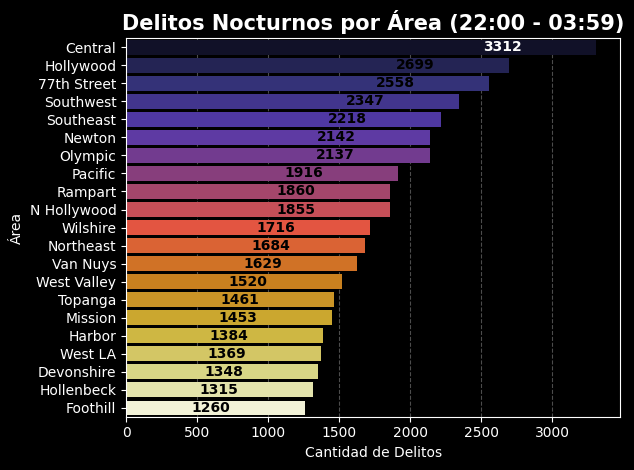

In [42]:
plt.style.use("dark_background")

sns.barplot(
    data = crime_night,
    y = "AREA NAME",
    x = "Count",
    hue="AREA NAME",
    palette = "CMRmap",
    zorder=2
)

ax.set_axisbelow(True)               
plt.grid(axis='x', linestyle='--', alpha=0.3) 
plt.title("Delitos Nocturnos por Área (22:00 - 03:59)", fontsize=15, weight='bold')
plt.xlabel("Cantidad de Delitos")
plt.ylabel("Área")


for i, count in enumerate(crime_night['Count']):
    if count == crime_night['Count'].max():
        plt.text(count - 800 , i, str(count), va='center', color='white', fontweight='bold')
    else:
        plt.text(count -800 , i, str(count), va='center', color='black', fontweight='bold')
plt.tight_layout()
plt.savefig("src/crime_frequency_by_hour_night.svg")
plt.show()



# Consigna 3

In [43]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION', 'TIME OCC STR', 'HOUR OCC'],
      dtype='object')

In [44]:
bins = [0, 18, 26, 35, 45, 55, 65, np.inf]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=False)

In [45]:
victim_ages = crimes['Age Group'].value_counts().sort_index()
victim_ages

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64

## Grafico

In [46]:
colors = plt.cm.plasma(np.linspace(0, 0.85, len(victim_ages.values)))
explode = [0.1 if label == "26-34" else 0 for label in victim_ages.index]


plt.style.use("dark_background")
# autopct='%1.1f%%' pone los porcentajes con un decimal
# startangle=140 rota el gráfico para una mejor perspectiva
# explode resalta el grupo con más delitos (26-34)
victim_ages

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64

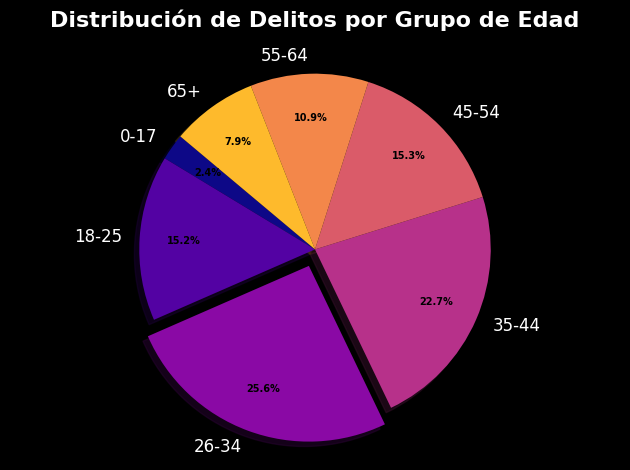

In [47]:
wedges, texts, autotexts = plt.pie(
    victim_ages.values,           
    labels=victim_ages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    shadow=True,
    pctdistance=0.75,
    labeldistance=1.1,
)
for text in texts:
    text.set_fontsize(12)
    text.set_color('white')
    
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')
    autotext.set_fontsize(7)

plt.title("Distribución de Delitos por Grupo de Edad", fontsize=16, weight='bold', pad=20)
plt.axis('equal') 

plt.tight_layout()
plt.savefig('src/crime_distribution_by_age_group.svg')
plt.show()